## Exploratory Data Analysis (EDA) for Sleep and lifestyle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

To begin with, you have to check the data first for example columns name, what kind of type they have. now using df.head() you look first 5 rows and df.info() you look dtype of columns, number of missing values or null and lenght of dataframe

In [2]:
file = r'Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(file)
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


df.info() to check count of missing values and see type of columns 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


after looked the data I modified some columns, create some new columns and drop others

In [4]:
#replacing null for none in Sleep_Disorder & replacing normal weight with normal in BMI column
df.columns = [col.replace(' ','_') for col in df.columns]
df['Sleep_Disorder'].fillna('No Disorder', inplace=True)
df['BMI_Category'] = df['BMI_Category'].replace('Normal Weight', 'Normal')
df.drop('Person_ID', axis=1, inplace=True)

In [5]:
# slipt blood pressure in 2 new columns
df['systolic_bp'] = df['Blood_Pressure'].apply(lambda x: x.split('/')[0]).astype('int64')
df['diastolic_bp'] = df['Blood_Pressure'].apply(lambda x: x.split('/')[1]).astype('int64')
df.drop('Blood_Pressure', axis=1, inplace=True)
df.head(5)

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,systolic_bp,diastolic_bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


df.describe() is good to check the stats of numerics columns, you can see max,min,quartiles,std,mean and counts

In [6]:
df.describe()

,Age,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,Heart_Rate,Daily_Steps,systolic_bp,diastolic_bp
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


After reviewing the dataset, I visualized the distribution of key variables to better understand patterns and potential insights. I used different types of plots, each serving a specific purpose:

-histplot: Used for visualizing the distribution of numerical variables, helping to identify skewness, outliers, and normality.
-countplot: Helps in analyzing the frequency of categorical values, making it easier to see class imbalances.
-boxplot: Useful for detecting outliers and understanding the spread of numerical variables across different categories.
-pie chart: Shows proportions of categorical variables, useful for understanding class distributions in percentage form.

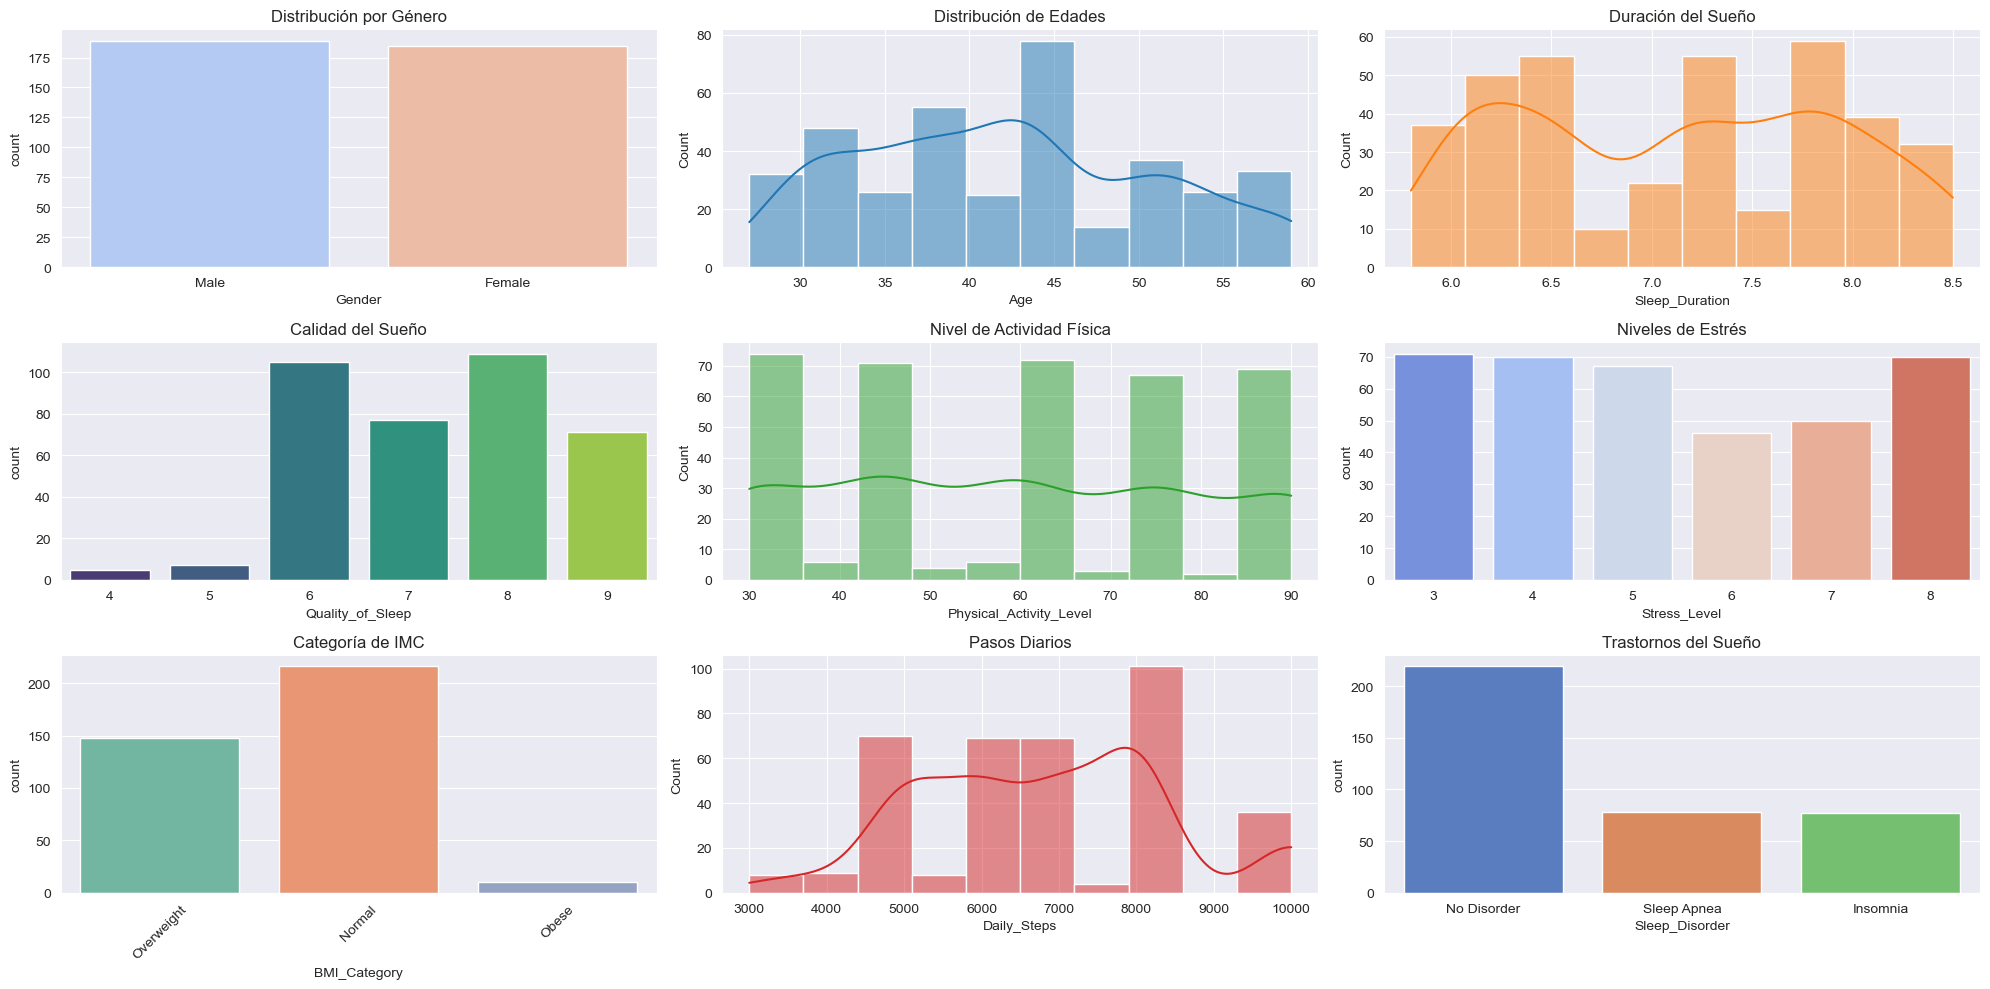

In [7]:
# Establecer estilo y colores personalizados
sns.set_style("darkgrid")
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22"]

fig, ax = plt.subplots(3, 3, figsize=(20, 10))

# Gráficos personalizados
sns.countplot(x='Gender', data=df, ax=ax[0, 0], palette="coolwarm")
ax[0, 0].set_title("Distribución por Género")

sns.histplot(df['Age'], bins=10, kde=True, color=colors[0], ax=ax[0, 1])
ax[0, 1].set_title("Distribución de Edades")

sns.histplot(df['Sleep_Duration'], bins=10, kde=True, color=colors[1], ax=ax[0, 2])
ax[0, 2].set_title("Duración del Sueño")

sns.countplot(x='Quality_of_Sleep', data=df, ax=ax[1, 0], palette="viridis")
ax[1, 0].set_title("Calidad del Sueño")
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=0)

sns.histplot(df['Physical_Activity_Level'], bins=10, kde=True, color=colors[2], ax=ax[1, 1])
ax[1, 1].set_title("Nivel de Actividad Física")

sns.countplot(x='Stress_Level', data=df, ax=ax[1, 2], palette="coolwarm")
ax[1, 2].set_title("Niveles de Estrés")

sns.countplot(x='BMI_Category', data=df, ax=ax[2, 0], palette="Set2")
ax[2, 0].set_title("Categoría de IMC")
ax[2, 0].set_xticklabels(ax[2, 0].get_xticklabels(), rotation=45)

sns.histplot(df['Daily_Steps'], bins=10, kde=True, color=colors[3], ax=ax[2, 1])
ax[2, 1].set_title("Pasos Diarios")

sns.countplot(x='Sleep_Disorder', data=df, ax=ax[2, 2], palette="muted")
ax[2, 2].set_title("Trastornos del Sueño")

# Ajustar diseño
plt.tight_layout()
plt.show()


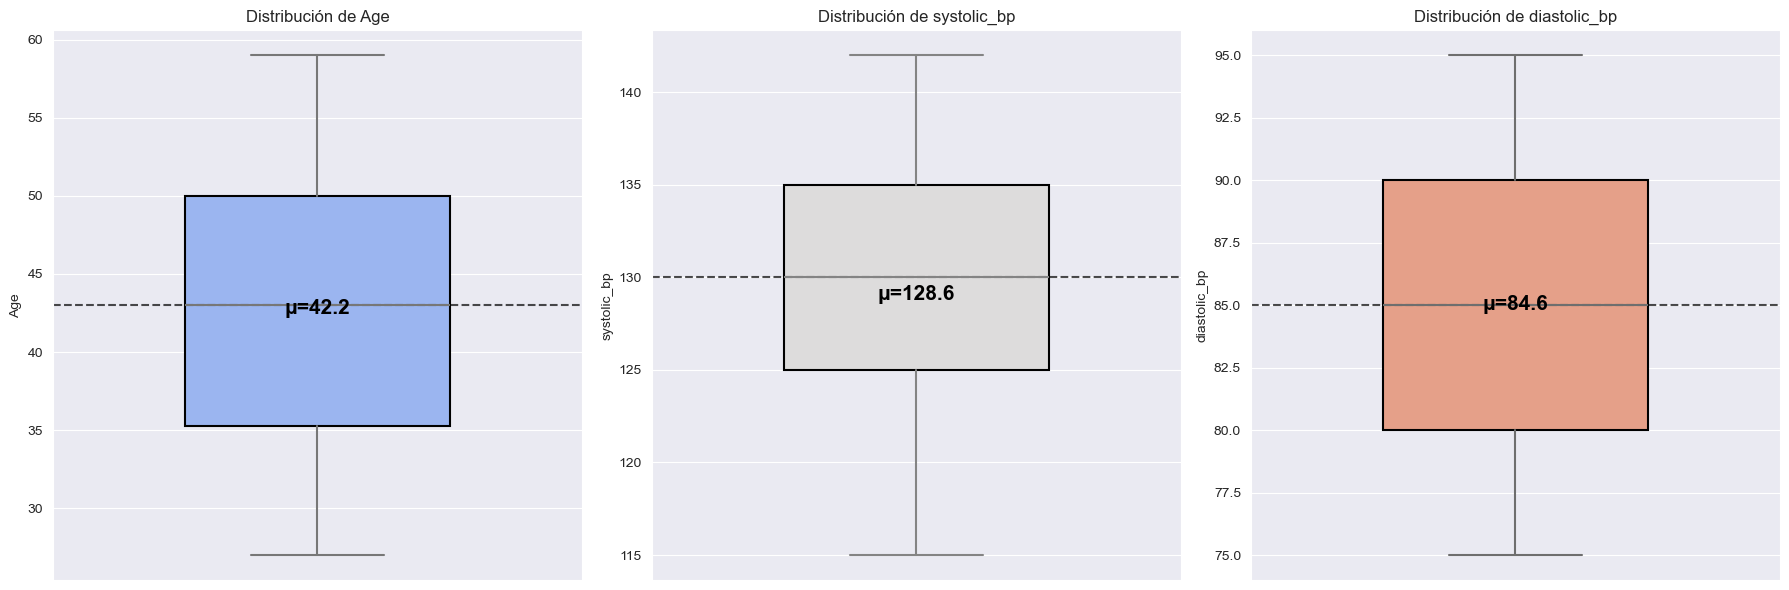

In [8]:
# numerics features
num_vars = ["Age", "systolic_bp", "diastolic_bp"]

fig, ax = plt.subplots(1, len(num_vars), figsize=(6 * len(num_vars), 6))

# If there is only one variable, convert x to list to avoid errors
if len(num_vars) == 1:
    ax = [ax]

# generate chart for each columns
for i, col in enumerate(num_vars):
    # change colours palette
    color = sns.color_palette("coolwarm", len(num_vars))[i]
    
    # generate boxplot
    sns.boxplot(y=df[col], ax=ax[i], color=color, width=0.5, boxprops=dict(edgecolor="black"))
    
    mean_value = df[col].mean()
    median_value = df[col].median()

    ax[i].axhline(median_value, linestyle="dashed", color="black", alpha=0.7)
    
    #add numeric value inside of boxplot
    ax[i].text(0, mean_value, f"μ={mean_value:.1f}", ha="center", va="bottom", fontsize=15, color="black", fontweight="bold")

    #set titles
    ax[i].set_title(f"Distribución de {col}")
    ax[i].set_xlabel("")  #delete label of axis X
    ax[i].set_ylabel(col)

plt.tight_layout()
plt.show()

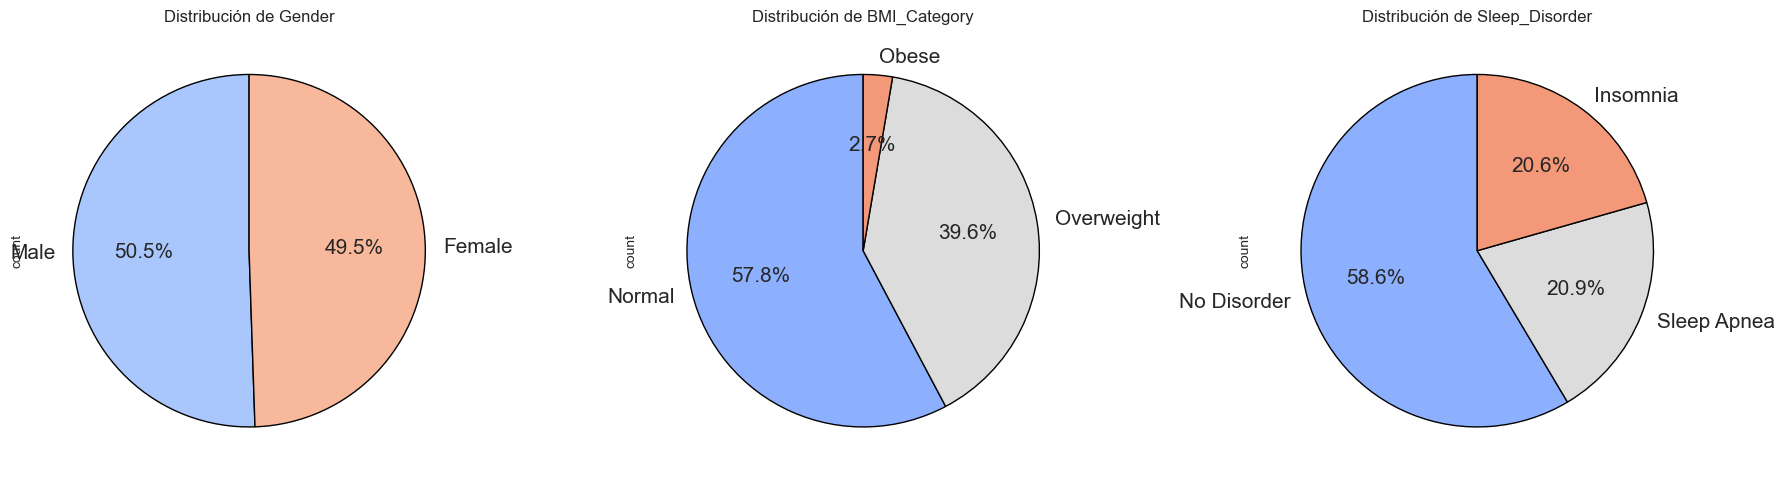

In [9]:
#list of features
cols = ["Gender", "BMI_Category", "Sleep_Disorder"]

fig, ax = plt.subplots(1, 3, figsize=(18, 6)) #change subplots if you add another feature

#generate graphics according a columns
for i, col in enumerate(cols):
    colors = sns.color_palette("coolwarm", n_colors=df[col].nunique())  # automatic palette acorriding numbers of features
    df[col].value_counts().plot.pie(ax=ax[i],fontsize=15, autopct="%1.1f%%", startangle=90, colors=colors, 
                                    wedgeprops={'edgecolor': 'black'})
    ax[i].set_title(f"Distribución de {col}")

plt.tight_layout()
plt.show()


## Random Forest Model to Sleep and Health

After completing the EDA, I prepared the data for modeling by transforming categorical variables into numeric representations and refining feature selection:

1. Encoding categorical features: I used LabelEncoder from sklearn to convert categorical variables into numeric values, ensuring they could be used in the model.

2. Feature correlation analysis: I computed the correlation matrix to identify highly correlated features.
Since some variables had a similar impact on the Random Forest model, I removed redundant ones to improve model interpretability.

3. Feature selection using RFE (Recursive Feature Elimination): I applied RFE from sklearn.feature_selection to iteratively select the most relevant variables for the model, reducing dimensionality while keeping predictive power.

In [10]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import chi2_contingency

# category columns
vars_cat = ['Gender', 'Occupation', 'BMI_Category', 'Sleep_Disorder']

# dict
label_mappings = {}

# apply LabelEncoder for each columns
for col in vars_cat:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Transform columns
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))  # Guardar el mapeo
    
    print(f"Codification for {col}: {label_mappings[col]}")  # Mostrar la relación

Codification for Gender: {'Female': 0, 'Male': 1}
Codification for Occupation: {'Accountant': 0, 'Doctor': 1, 'Engineer': 2, 'Lawyer': 3, 'Manager': 4, 'Nurse': 5, 'Sales Representative': 6, 'Salesperson': 7, 'Scientist': 8, 'Software Engineer': 9, 'Teacher': 10}
Codification for BMI_Category: {'Normal': 0, 'Obese': 1, 'Overweight': 2}
Codification for Sleep_Disorder: {'Insomnia': 0, 'No Disorder': 1, 'Sleep Apnea': 2}


In [11]:
# # revest the features
# for col in vars_cat:
#     reverse_mapping = {v: k for k, v in label_mappings[col].items()}  
#     df[col] = df[col].map(reverse_mapping)  

# df[vars_cat].head()

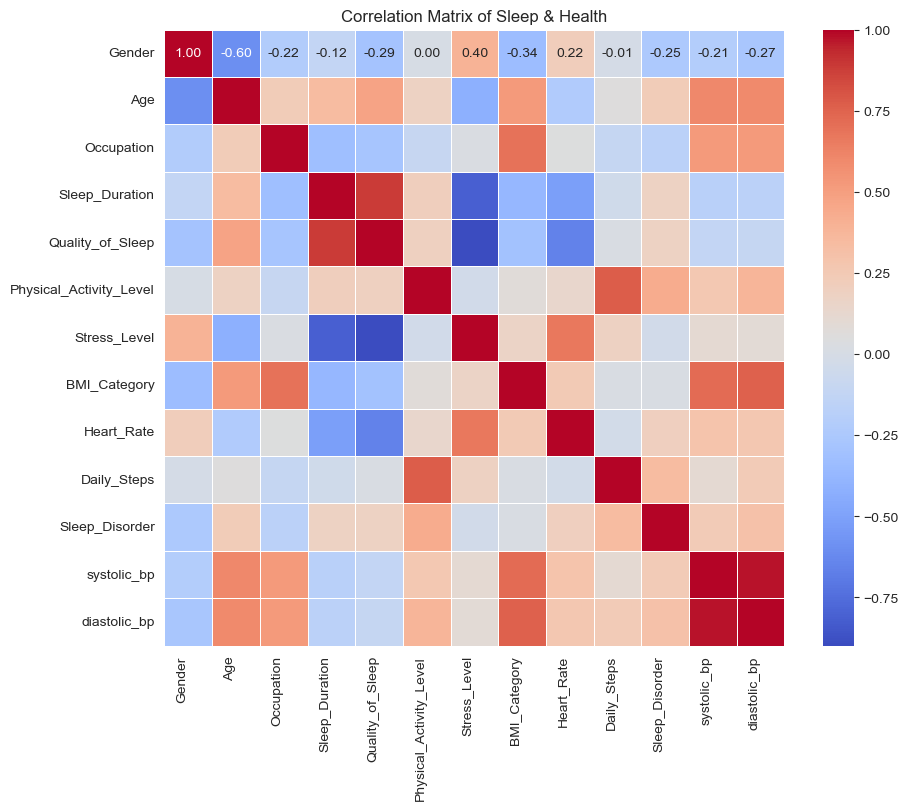

                           Gender       Age  Occupation  Sleep_Duration  \
Gender                   1.000000 -0.596358   -0.219113       -0.121579   
Age                     -0.596358  1.000000    0.231188        0.344709   
Occupation              -0.219113  0.231188    1.000000       -0.325775   
Sleep_Duration          -0.121579  0.344709   -0.325775        1.000000   
Quality_of_Sleep        -0.291366  0.473734   -0.278071        0.883213   
Physical_Activity_Level  0.001454  0.178993   -0.103660        0.212360   
Stress_Level             0.396018 -0.422344    0.021123       -0.811023   
BMI_Category            -0.339945  0.523881    0.694390       -0.377637   
Heart_Rate               0.217105 -0.225606    0.043928       -0.516455   
Daily_Steps             -0.014509  0.057973   -0.105877       -0.039533   
Sleep_Disorder          -0.253415  0.232000   -0.169800        0.177552   
systolic_bp             -0.210527  0.605878    0.518561       -0.180406   
diastolic_bp            -

In [12]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title('Correlation Matrix of Sleep & Health')
plt.show()
print(corr_matrix)

In [13]:
corr_matrix = df.corr().abs()

# get top of matrix (no duplicates)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# find columns with over corr
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

print(f"Variables eliminated due to high correlation: {to_drop}")

df_filter = df.drop(columns=to_drop)


Variables eliminated due to high correlation: ['Quality_of_Sleep', 'Stress_Level', 'diastolic_bp']


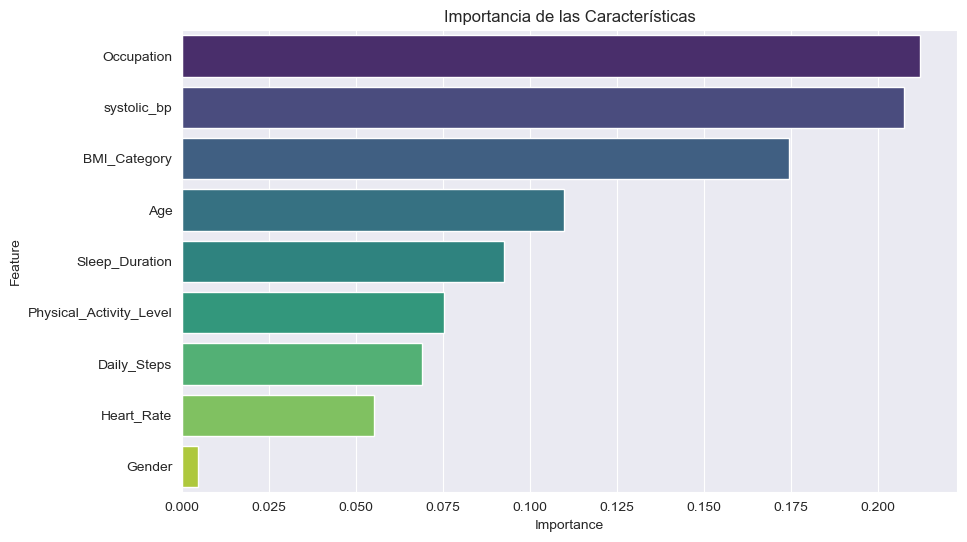

In [14]:
# split dependent variable
X = df_filter.drop(columns=['Sleep_Disorder']) 
y = df_filter['Sleep_Disorder']

# model training
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

#Get the importances
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Importancia de las Características')
plt.show()

In [15]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=rf, n_features_to_select=5)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("selected features:", selected_features)

selected features: Index(['Age', 'Occupation', 'Physical_Activity_Level', 'BMI_Category',
       'systolic_bp'],
      dtype='object')


After selecting the most relevant features (Age, Occupation, Physical Activity Level, BMI Category, and Systolic BP), I proceeded with model training and evaluation:

Data Splitting: The dataset was split into 80% training and 20% testing to ensure a balanced evaluation.

Model Performance: The model achieved an accuracy of 97.33%, indicating strong predictive performance.

The classification report provides deeper insights: Precision (positive predictive value) and recall (true positive rate) were both high across all classes.
The F1-score suggests a well-balanced model with minimal misclassifications.
The macro average shows similar performance across all classes, while the weighted average confirms the model's strong overall performance.

In [16]:
#  Use only selected features to run the model
X_selected = X[list(selected_features)]

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# split data in train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# training the model with train data
rf.fit(X_train, y_train)

# do prediction with test data 
y_pred = rf.predict(X_test)

# model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9733333333333334
Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       1.00      1.00      1.00        44
           2       0.94      0.94      0.94        16

    accuracy                           0.97        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.97      0.97      0.97        75



After training and testing the model, I applied 5-fold cross-validation to ensure that the results were not biased due to a specific train-test split.

Why Cross-Validation?
It helps assess how well the model generalizes to unseen data.
By splitting the dataset into multiple folds, each fold serves as a test set once while the others are used for training.

how to interpret it?
Fold-wise accuracy scores: Shows performance across different data splits.
Mean accuracy: Represents the overall performance of the model.
Standard deviation: Measures variability; a lower value means the model is stable across different splits.




Model's Interpretation:

1.The mean accuracy (65.82%) is decent, but there is a significant variation between folds.
2.High standard deviation (16.09%) suggests that the model's performance is inconsistent across different data splits.
3.Fold-wise variation:
Some folds performed well (82.66% and 83.78% accuracy).
Others performed poorly (48% and 46.66% accuracy).
This inconsistency indicates possible overfitting, data imbalance, or insufficient feature generalization.


In [17]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier  # O el modelo que estés usando

# Model
model = RandomForestClassifier(random_state=42)

# cross validation with 5 folds
cv_scores = cross_val_score(model, X_selected, y, cv=5, scoring='accuracy')

# Show results
print("Scores for each fold:", cv_scores)
print("Accuracy mean:", cv_scores.mean())
print("Accuracy std:", cv_scores.std())

Scores for each fold: [0.68       0.48       0.82666667 0.46666667 0.83783784]
Accuracy mean: 0.6582342342342342
Accuracy std: 0.16097593762963142


With result in Based on the first cross-validation results, we can suspect that the target variable is imbalanced, so to fix it I try with Stratified K-Fold Cross-Validation 

What is K-Fold Cross-Validation?
In K-Fold Cross-Validation, the dataset is divided into K equal-sized folds.

The model is trained on K-1 folds and tested on the remaining fold.
This process repeats K times, with a different test fold each time.
The final performance metric is the average of all K runs

In [18]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_selected, y, cv=skf, scoring='accuracy')

print("New CV Scores:", cv_scores)
print("New Mean Accuracy:", cv_scores.mean())
print("New Standard Deviation:", cv_scores.std())

New CV Scores: [0.94666667 0.93333333 0.90666667 0.86666667 0.91891892]
New Mean Accuracy: 0.9144504504504505
New Standard Deviation: 0.02741639052246102
